# Chapter 2

https://github.com/pymc-devs/resources/blob/master/Rethinking_2/Chp_02.ipynb
https://raw.githubusercontent.com/Booleans/statistical-rethinking/master/Statistical%20Rethinking%202nd%20Edition.pdf

In [2]:
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pymc3 as pm
import scipy.stats as stats


ERROR (theano.gpuarray): pygpu was configured but could not be imported or is too old (version 0.7 or higher required)
NoneType: None


In [35]:
RANDOM_SEED = 8927
np.random.seed(RANDOM_SEED)
az.style.use("arviz-darkgrid")

plt.rcParams['figure.figsize'] = [4.0, 3.0]
plt.rcParams["font.size"] = 14
plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1.5

In [5]:
stats.binom.pmf(6, n =9, p=0.5)

0.16406250000000006

$ W \sim Bino(N,p)$

$p \sim Uni(0,1)$

$$
\begin{align}
P(W,L,p) &= P(W,L \vert p) P(p) \\
P(W,L,p) &= P(p \vert W,L) P(W,L) \\ \\
P(W,L \vert p) P(p) &= P(p \vert W,L) P(W,L) \\
P(p \vert W,L) &= \frac{P(W,L \vert p) P(p)}{P(W,L)}
\end{align}
$$

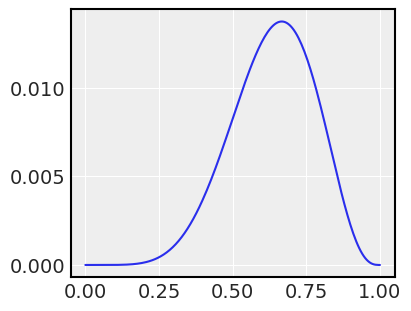

In [36]:
# code 2.3
npoints = 200
p_grid = np.linspace(0, 1, npoints)
prior = np.linspace(1,1,npoints)
#prior = np.exp(5*p_grid)
likelihood = stats.binom.pmf(6, n=9, p=p_grid)
unst_posterior = likelihood*prior
posterior = unst_posterior / np.sum(unst_posterior)

# code 2.4
plt.plot(p_grid, posterior)
plt.show()

In [42]:
# code 2.6
data = np.repeat((0,1), (3,6))

with pm.Model() as quap:
    p = pm.Uniform("p", 0, 1) # uniform prior
    w = pm.Binomial("w", n=len(data), p=p, observed=np.sum(data))
    mean_q = pm.find_MAP()
    std_q = ((1 / pm.find_hessian(mean_q, vars=[p])) ** 0.5)[0]

print(mean_q["p"], std_q[0])


0.6666667 0.15713483


In [46]:
# 89% interval
norm = stats.norm(mean_q, std_q)
prob = 0.89
z = stats.norm.ppf([(1-prob) / 2, (1+prob) /2])
pi = mean_q["p"] + std_q * z
print(pi[0], pi[1])

0.41553487766495795 0.9177984954048054


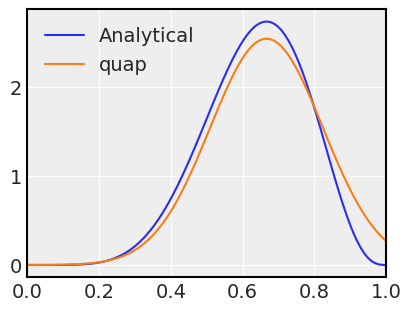

In [110]:
# code 2.7

# analytical calculation
w = 6
l = 3
x = np.linspace(0,1,100)

plt.plot(x, stats.beta.pdf(x , w+1, l+1), label="Analytical")

# quadratic calculation
plt.plot(x, stats.norm.pdf(x, mean_q["p"], std_q[0]), label="quap")
plt.legend()
plt.xlim([0,1]);

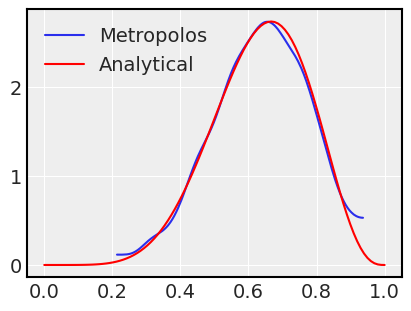

In [112]:
# code 2.8

n_samples = 2000
p = np.zeros(n_samples)
p[0] = 0.5
W = 6
L = 3
for i in range(1, n_samples):
    p_new = stats.norm(p[i-1], 0.1).rvs(1)
    if p_new < 0:
        p_new = -p_new
    if p_new > 1:
        p_new = 2 - p_new
    q0 = stats.binom.pmf(W, n=W+L, p=p[i-1])
    q1 = stats.binom.pmf(W, n=W+L, p=p_new)
    if stats.uniform.rvs(0, 1) < q1 / q0:
        p[i] = p_new
    else:
        p[i] = p[i - 1]
        
az.plot_kde(p, label="Metropolos")
plt.plot(np.linspace(0, 1, 100), stats.beta.pdf(x, W + 1, L + 1), color="r", label="Analytical")
plt.legend();

# End-of-Chapter Exercises

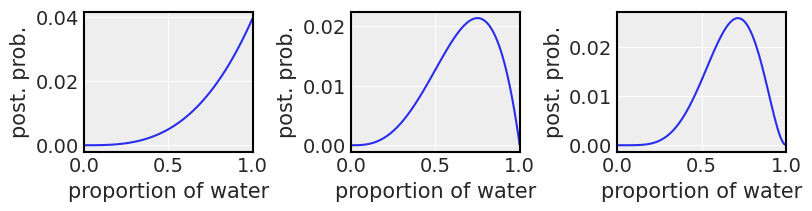

In [124]:
# 2M1.
# data
W = [3, 3, 5]
L = [0, 1, 2]
npoints = 100
p_grid = np.linspace(0, 1, npoints)
prior = np.linspace(1, 1, npoints)

fig, ax = plt.subplots(1,3, figsize=(8,2))
for i in range(3):
    likelihood = stats.binom.pmf(W[i], n=W[i]+L[i], p=p_grid)
    unst_posterior = likelihood * prior
    posterior = unst_posterior / np.sum(unst_posterior)
    ax[i].plot(p_grid, posterior)
    ax[i].set_xlim([0,1])
    ax[i].set_xlabel('proportion of water')
    ax[i].set_ylabel('post. prob.')

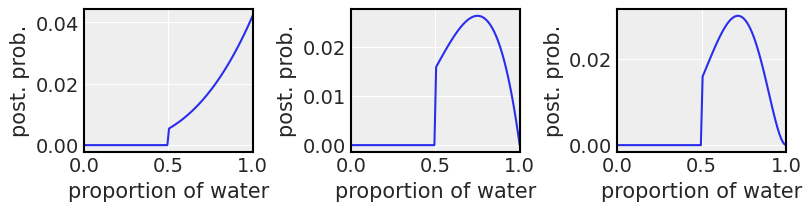

In [125]:
# 2M2.
# data
W = [3, 3, 5]
L = [0, 1, 2]
npoints = 100
p_grid = np.linspace(0, 1, npoints)
prior = np.linspace(1, 1, npoints)
prior[0:int(npoints/2)] = 0

fig, ax = plt.subplots(1,3, figsize=(8,2))
for i in range(3):
    likelihood = stats.binom.pmf(W[i], n=W[i]+L[i], p=p_grid)
    unst_posterior = likelihood * prior
    posterior = unst_posterior / np.sum(unst_posterior)
    ax[i].plot(p_grid, posterior)
    ax[i].set_xlim([0,1])
    ax[i].set_xlabel('proportion of water')
    ax[i].set_ylabel('post. prob.')

In [130]:
# 2M3.
# P(E|l) = p(E and l) / P(l)
p_land = (0.3*0.5) + (1*0.5)
p_land_and_earth = 0.15
p_land_and_earth / p_land

0.23076923076923075

In [ ]:
# 2M4.
# c1: 2 b
# c2: 1 b 1 w
# c3: 2 w
# given: black side up
# problem: p(black) on other side

# c3 is excluded
# ways this could have happened: c1 (side1), c1 (side2), c2 (side1)
# thus 2/3

In [ ]:
# 2M5.
# c1: B/B
# c2: B/W
# c3: W/W
# c4" B/B

# given: black side up
# problem: p(black) on other side

# ways this could have happened: c1s1, c1s2, c2s1, c4s1, c4s1 -> 5
# ways black on other side: c1s1, c1s2, c4s1, c4s2 -> 4
# 4/5

In [ ]:
# 2M6.
# c1: B/B
# c2: B/W
# c3: W/W
# 1:2:3

# given: black side up
# problem: p(black) on other side

# ways this could have happened: c1s1, c1s2, c2s1, c2s1-> 4
# ways black on other side: c1s1, c1s2 -> 2
# 2/4

In [ ]:
# 2M7.
# c1: B/B
# c2: B/W
# c3: W/W

# given: black side up, then white side up
# problem: p(black) on other side

# ways this could have happened:
# 11 21 # black
# 11 31 # black
# 11 32 # black
# 12 21 # black
# 12 31 # black
# 12 32 # black
# 21 31 # white
# 21 32 # white
# 6/8 = 0.75

In [135]:
# 2H1.
# 2 times as likely that its species B
p = 1/3*0.1 + 2/3*0.2
print(p, " equals 1/6 | p*6=", p*6)

0.16666666666666666  equals 1/6 | p*6= 1.0


In [ ]:
# 2H2.
# Species B is twice as likely as Species A, thus 1/3

In [141]:
# 2H3.
# twins, then singleton
# p(A|T,S)?
# p(A|S,T) = p(S,T|A)p(A) / ( p(S,T|A)p(A) + p(S,T|B)p(B) )
0.1*0.9*0.5 / (0.1*0.9*0.5 + 0.2*0.8*0.5)

0.36

In [145]:
# 2H4.
# p(Aresult | A) = 0.8
# p(Aresult | B) = 0.35
# outcome = A
# p(A | Aresult)?
# p(A | Aresult) = p(Aresult | A)p(A) / ( p(Aresult|A)p(A) + p(Aresult|B)p(B))
print(0.8 / (0.8 + 0.35))

# p(A |T,S,Ares) = p(T,S,Ares | A)p(A) / ( p(T,S,Ares)p(A) + p(T,S,Ares|B)p(B))
print(0.1*0.9*0.8 / (0.1*0.9*0.8 + 0.2*0.8*0.35))

0.6956521739130436
0.5625
